<a href="https://colab.research.google.com/github/gayaneghazaryan/DataTalksClub_ML_Zoomcamp2023/blob/main/DataTalksClub_ML_Zoomcamp_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-25 20:16:53--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.07s   

2023-09-25 20:16:53 (18.6 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('housing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<Axes: ylabel='Frequency'>

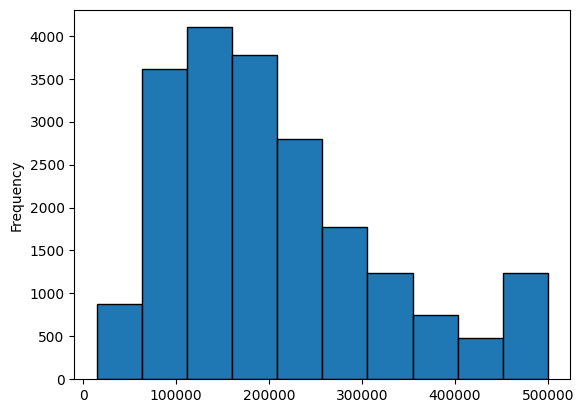

In [4]:
df['median_house_value'].plot(kind='hist', edgecolor = 'black')

In [12]:
df.shape

(20640, 10)

In [17]:
df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

In [18]:
missing_values = df.isna().sum()
missing_values[missing_values > 0]

total_bedrooms    157
dtype: int64

In [19]:
df['population'].median()

1195.0

In [27]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
X_trainval, X_test = train_test_split(df, test_size = 0.2, random_state = 42)
X_train, X_val = train_test_split(X_trainval, test_size = 0.25, random_state = 42)


In [26]:
X_train['median_house_value'] = np.log1p(X_train['median_house_value'])

In [47]:
X_train_encoded = pd.get_dummies(X_train, columns=['ocean_proximity'])
X_val_encoded = pd.get_dummies(X_val, columns = ['ocean_proximity'] )

In [52]:
X_train_0 = X_train_encoded.copy()
X_train_0['total_bedrooms'].fillna(0, inplace = True)

mean_value = X_train_encoded['total_bedrooms'].mean()
X_train_mean = X_train_encoded.copy()
X_train_mean['total_bedrooms'].fillna(mean_value, inplace = True)

In [60]:
X_val_0 = X_val_encoded.copy()
X_val_0['total_bedrooms'].fillna(0, inplace = True)

mean_value = X_val_encoded['total_bedrooms'].mean()
X_val_mean = X_val_encoded.copy()
X_val_mean['total_bedrooms'].fillna(mean_value, inplace = True)

In [61]:
def train_and_evaluate(df, X_val):
    X = df.drop('median_house_value', axis=1)
    y = df['median_house_value']

    model = LinearRegression()
    model.fit(X, y)

    val_X = X_val.drop('median_house_value', axis=1)
    val_y = X_val['median_house_value']
    val_predictions = model.predict(val_X)

    rmse = np.sqrt(mean_squared_error(val_y, val_predictions))

    return rmse

In [62]:
rmse_fill_0 = train_and_evaluate(X_train_0, X_val_0)
rmse_fill_mean = train_and_evaluate(X_train_mean, X_val_mean)

print("RMSE (Fill with 0):", round(rmse_fill_0, 2))
print("RMSE (Fill with Mean):", round(rmse_fill_mean, 2))

if rmse_fill_0 < rmse_fill_mean:
    print("Filling with 0 gives a better RMSE.")
else:
    print("Filling with Mean gives a better RMSE.")

RMSE (Fill with 0): 217971.08
RMSE (Fill with Mean): 217971.08
Filling with 0 gives a better RMSE.


In [63]:
from sklearn.linear_model import Ridge

In [78]:
def reg_train_and_evaluate(df, val):
    X_train = df.drop('median_house_value', axis=1)
    y_train = df['median_house_value']

    X_val = val.drop('median_house_value', axis=1)
    y_val = val['median_house_value']

    alpha_values = [0, 1e-6, 1e-4, 1e-3]

    for alpha in alpha_values:
      model = Ridge(alpha=alpha)
      model.fit(X_train, y_train)

      val_predictions = model.predict(X_val)

      rmse = np.sqrt(mean_squared_error(y_val, val_predictions))

      best_rmse = np.inf

      if rmse < best_rmse:
          best_rmse = rmse
          best_alpha = alpha

    print(f"Alpha={alpha}: RMSE = {rmse:.2f}")

In [79]:
reg_train_and_evaluate(X_train_0, X_val_0)

Alpha=0.001: RMSE = 217971.08


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.21149e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [84]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [100]:
X_train, X_test = train_test_split(df, test_size = 0.2, random_state = 9)
X_train['total_bedrooms'].fillna(0, inplace = True)
y_train = X_train['median_house_value']
X_train = X_train.drop('median_house_value', axis=1)
X_train = pd.get_dummies(X_train, columns = ['ocean_proximity'])

model = Ridge(alpha=0.001)
model.fit(X_train, y_train)

Ridge(alpha=0.001)

In [101]:
X_test.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [102]:
X_test['total_bedrooms'].fillna(0, inplace = True)
y_test = X_test['median_house_value']
X_test = X_test.drop('median_house_value', axis=1)
X_test = pd.get_dummies(X_test, columns = ['ocean_proximity'])


val_predictions = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, val_predictions))
print(f"RMSE (alpha={0.001}): {rmse:.2f}")

RMSE (alpha=0.001): 64049.64
